#### Loading Data

In [238]:
#import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# update the plot size
plt.rcParams.update({'figure.figsize': (20, 10), 'figure.dpi': 120})
#load the data
Energy_Data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip', delimiter = ';',low_memory=False, infer_datetime_format=True, parse_dates={'Datetime':[0,1]}, index_col=['Datetime'],na_values = '?', dtype = float, header=0)
#Energy_Data = pd.read_csv(r'C:\Users\James ok\Downloads\Compressed\household_power_consumption\household_power_consumption.txt', delimiter = ';',low_memory=False, infer_datetime_format=True, parse_dates={'Datetime':[0,1]}, index_col=['Datetime'],na_values = '?', dtype = float, header=0)
# print the first 5 element with pandas
Energy_Data.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


#### Wrangling Time Series Data

In [239]:
#check the datatype
Energy_Data.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [240]:
#count the number of rows in the dataset
Energy_Data.count()

Global_active_power      2049280
Global_reactive_power    2049280
Voltage                  2049280
Global_intensity         2049280
Sub_metering_1           2049280
Sub_metering_2           2049280
Sub_metering_3           2049280
dtype: int64

In [241]:
#Check the shape
Energy_Data.shape

(2075259, 7)

In [242]:
#Check for missing values
Energy_Data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [243]:
#Filling missing data by interpolation
Energy_Data = Energy_Data.interpolate(method='linear', limit_direction='forward')
#Check for missing values again
Energy_Data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [244]:
# add a column for for active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3
values = Energy_Data.values.astype('float64')
Energy_Data['Others'] = (values[:,0] * 1000 / 60) - values[:,4] - values[:,5] - values[:,6]
Energy_Data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Others
Datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


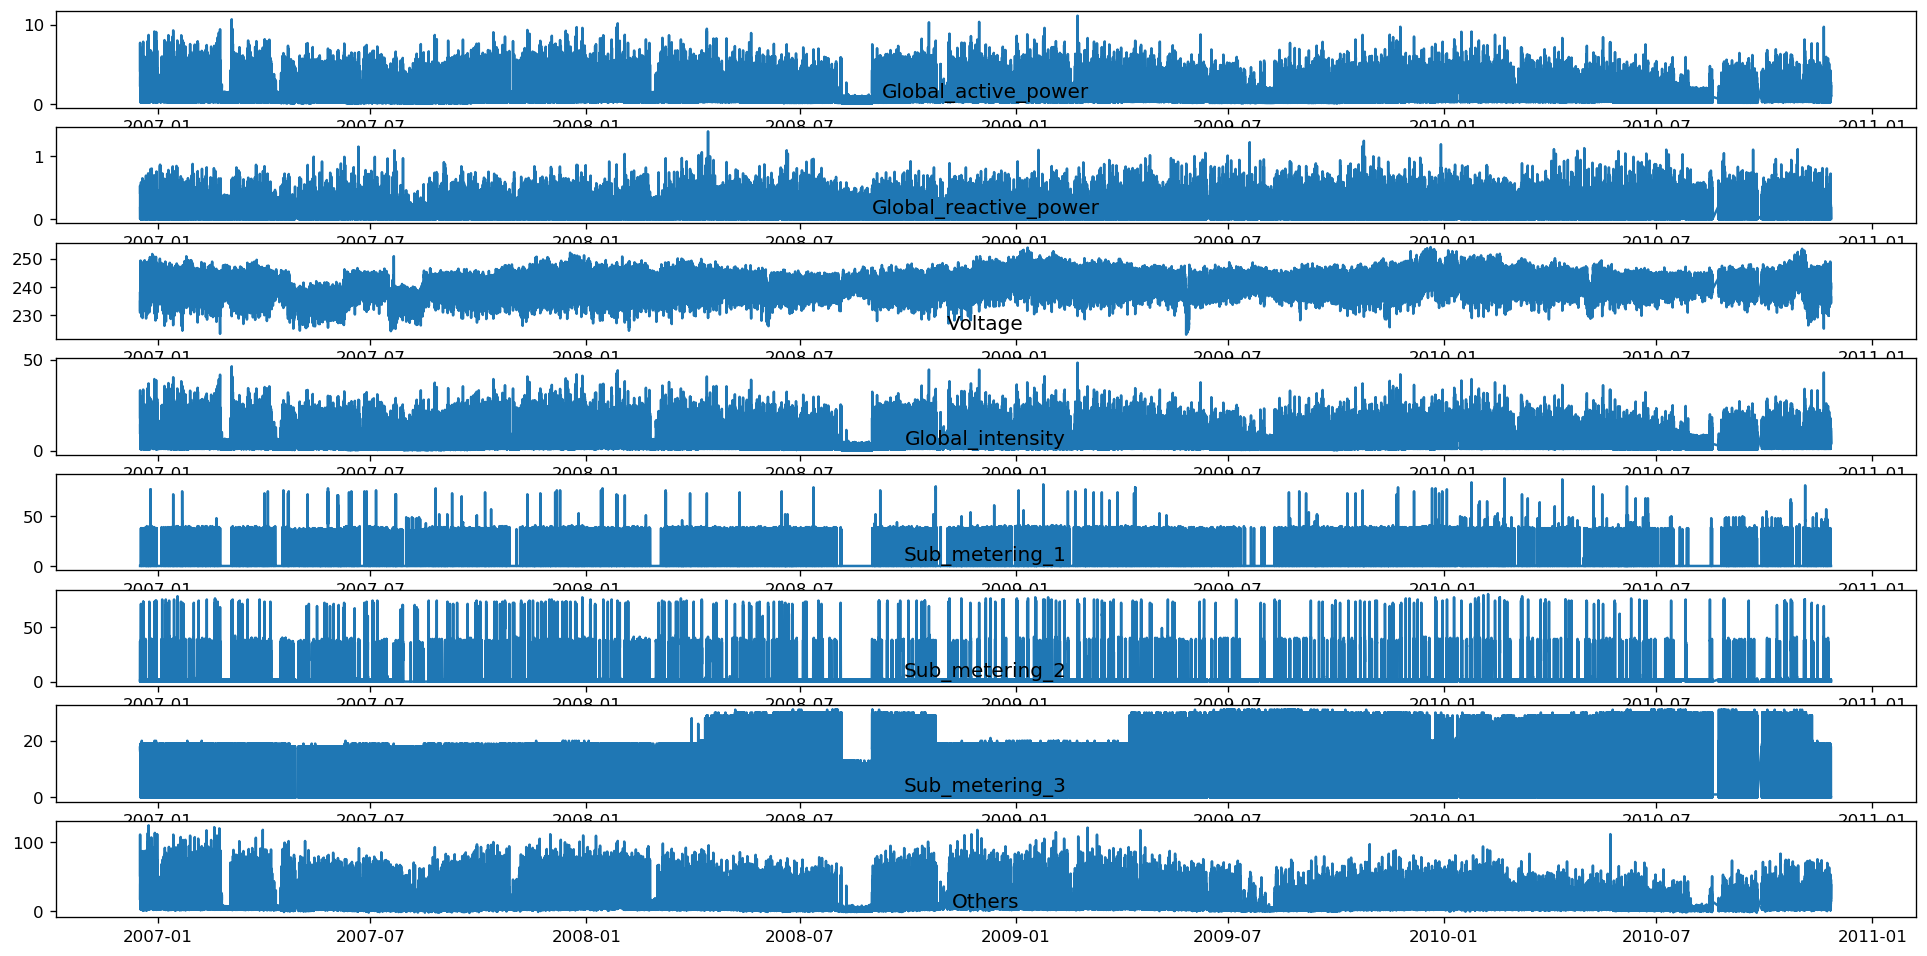

In [245]:
#Visualise all the columns in the data
for i in range(len(Energy_Data.columns)):
    plt.subplot(len(Energy_Data.columns), 1, i+1)
    plt.plot(Energy_Data[Energy_Data.columns[i]])
    plt.title(Energy_Data.columns[i], y=0)
plt.show()

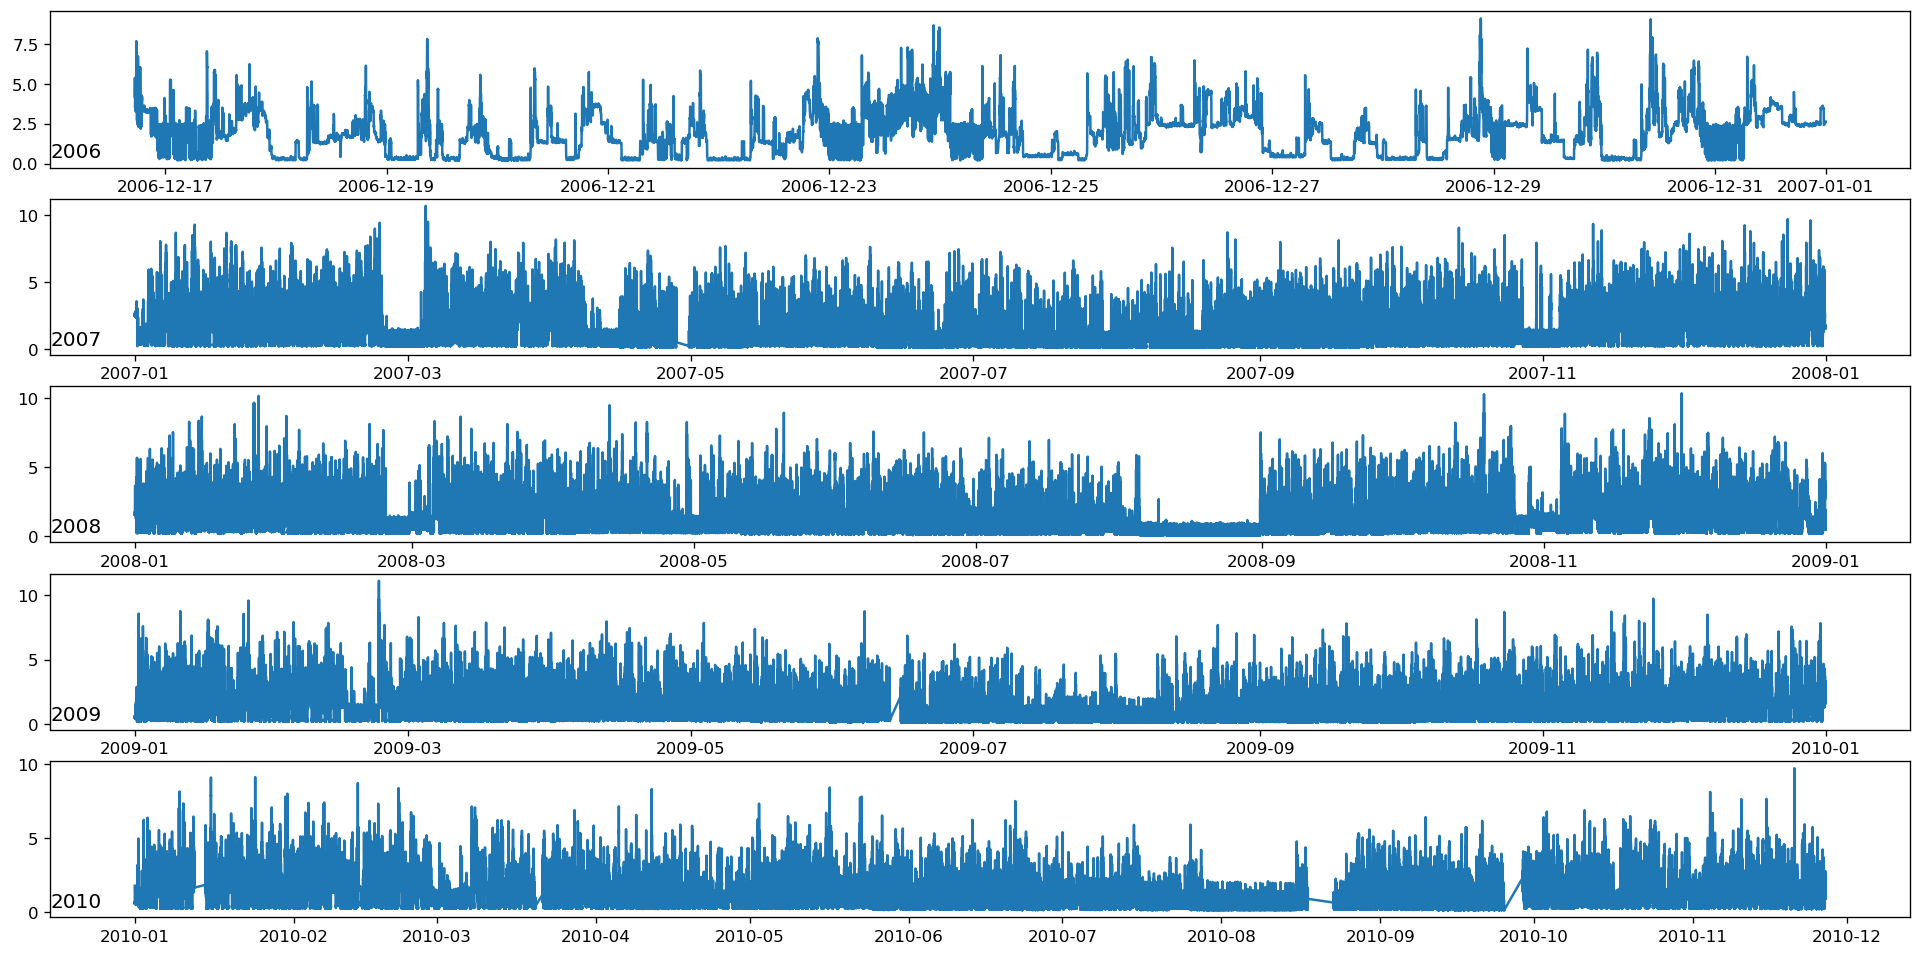

In [246]:
# plot active power for each year
years = ['2006','2007', '2008', '2009', '2010']
for i in range(len(years)):
# prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
# determine the year to plot
    year = years[i]

# get all observations for the year
    result = Energy_Data[str(year)]
# plot the active power for the year
    plt.plot(result['Global_active_power'])
# add a title to the subplot
    plt.title(str(year), y=0, loc='left')
plt.show()

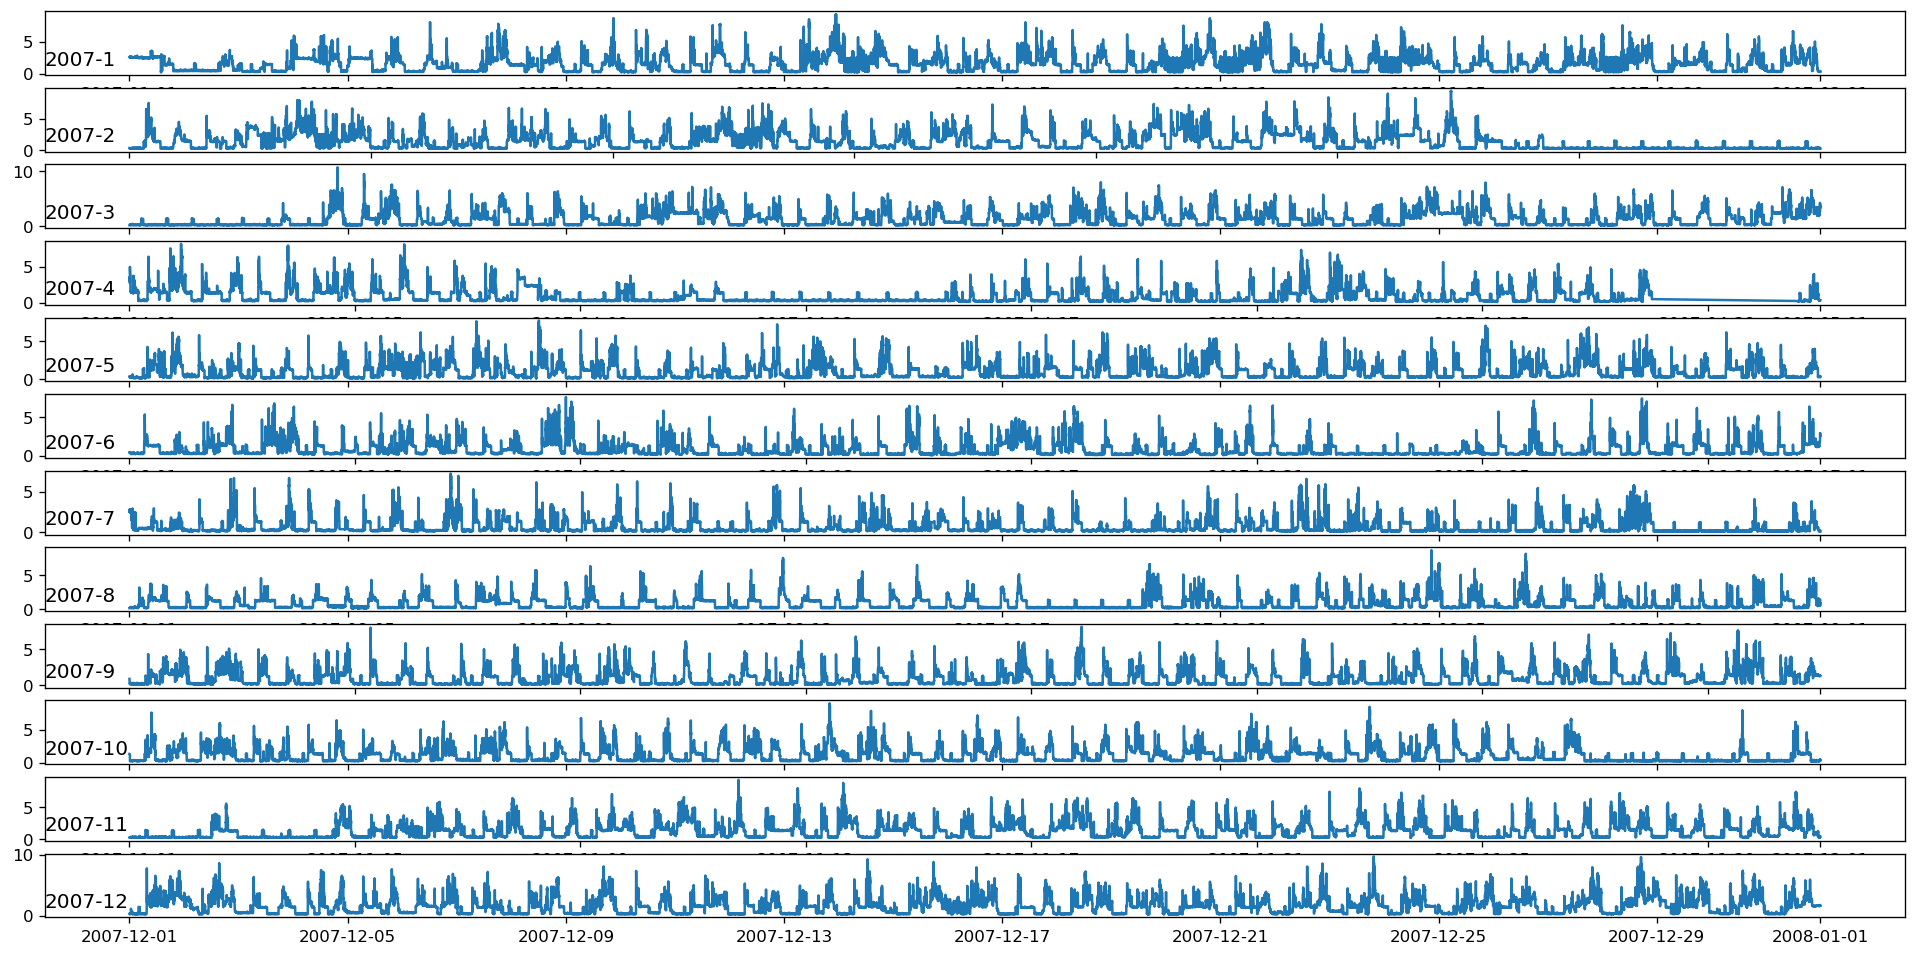

<Figure size 2400x1200 with 0 Axes>

In [247]:
# plot active power for each year
months = [x for x in range(1, 13)]
plt.figure(figsize=(20,10))
for i in range(len(months)):
# prepare subplot
    ax = plt.subplot(len(months), 1, i+1)
# determine the month to plot
    month = '2007-' + str(months[i])
# get all observations for the month
    result = Energy_Data[month]
# plot the active power for the month
    plt.plot(result['Global_active_power'])
# add a title to the subplot
    plt.title(month, y=0, loc='left')
plt.show()

plt.tight_layout()

In [248]:
#Downsample to daily data points
Energy_Data_Daily = Energy_Data.resample('D').sum()
Energy_Data_Daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Others
Datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933333
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666667
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433333
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900000
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800000


Text(0, 0.5, 'Energy')

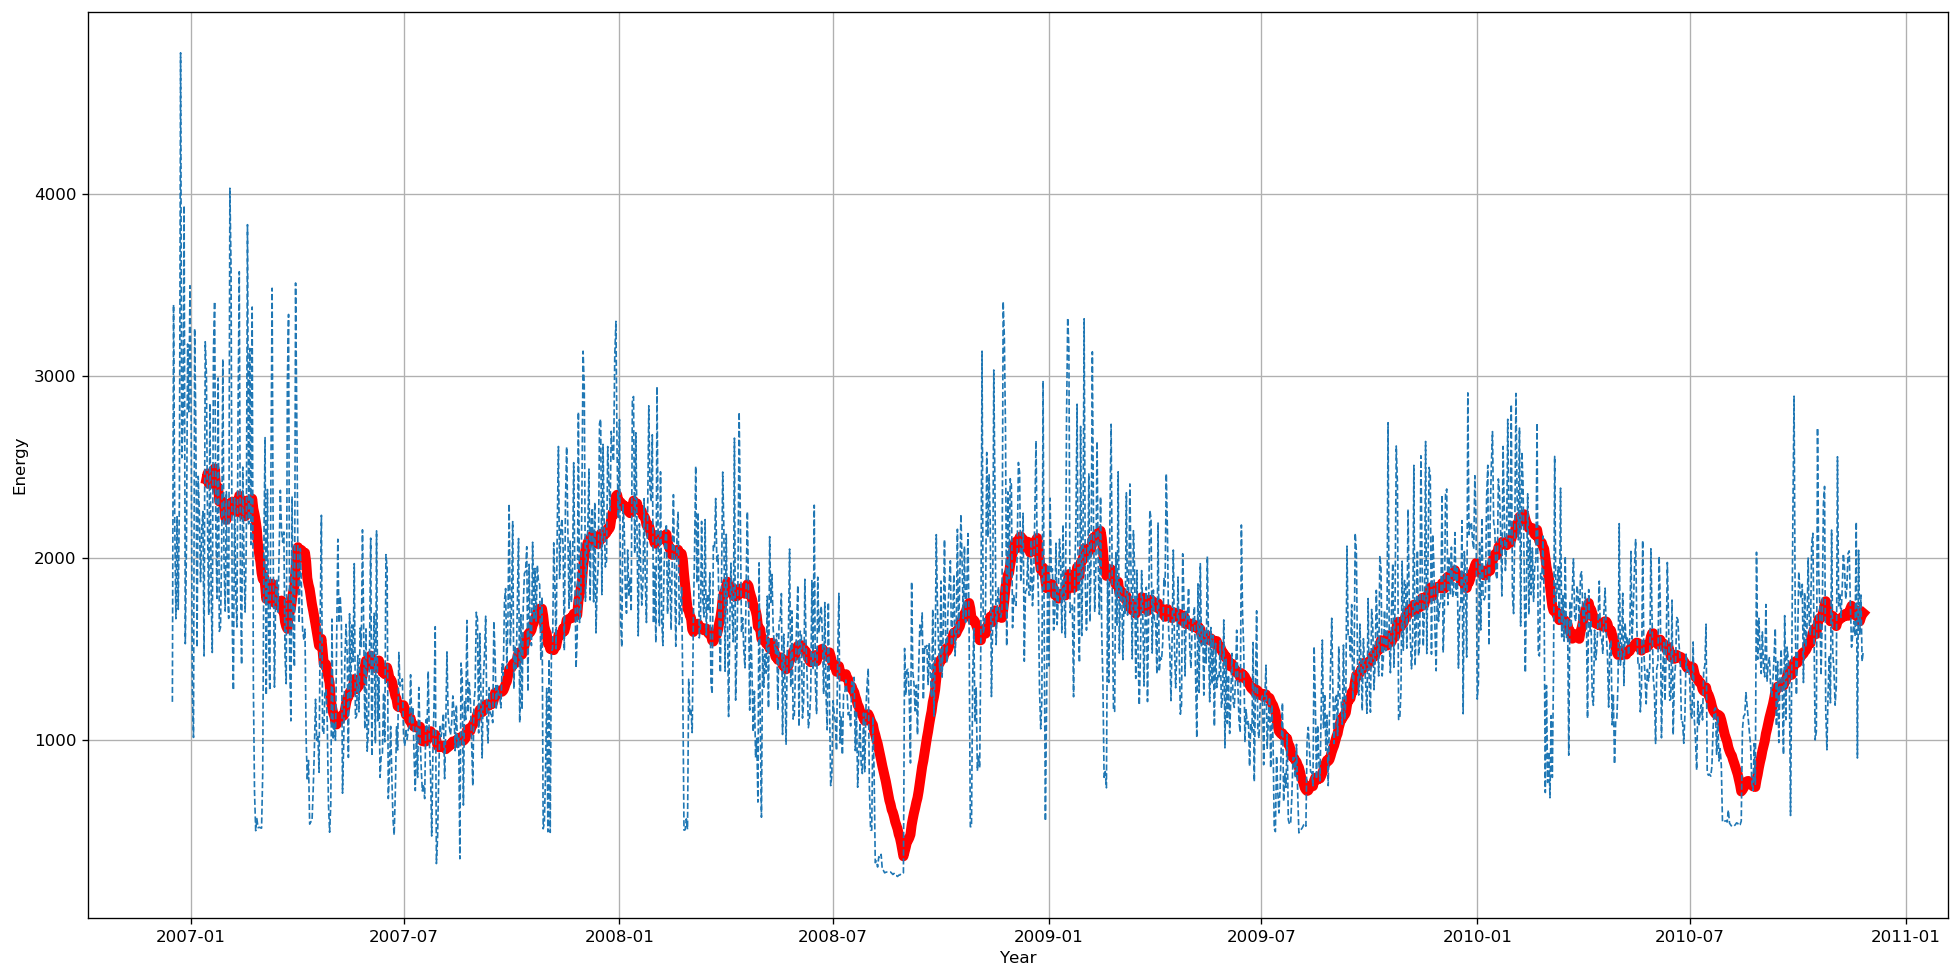

In [249]:
#Moving Average Smoothing
df_MA = Energy_Data_Daily.copy()
df_MA['Global_active_power']  = df_MA['Global_active_power'].rolling(30).mean() 
plt.figure(figsize=(20,10))
plt.plot(df_MA.index, df_MA.Global_active_power,'-',color='red',linewidth=6)
plt.plot(Energy_Data_Daily.index, Energy_Data_Daily.Global_active_power, '--', linewidth=1)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Energy')

In [250]:
Energy_Data_Daily.min(axis = 0)

Global_active_power        250.298000
Global_reactive_power       24.722474
Voltage                  93552.530000
Global_intensity          1164.000000
Sub_metering_1               0.000000
Sub_metering_2               0.000000
Sub_metering_3               0.000000
Others                    2313.633333
dtype: float64

#### Time SerieS Exploratory Data Analysis

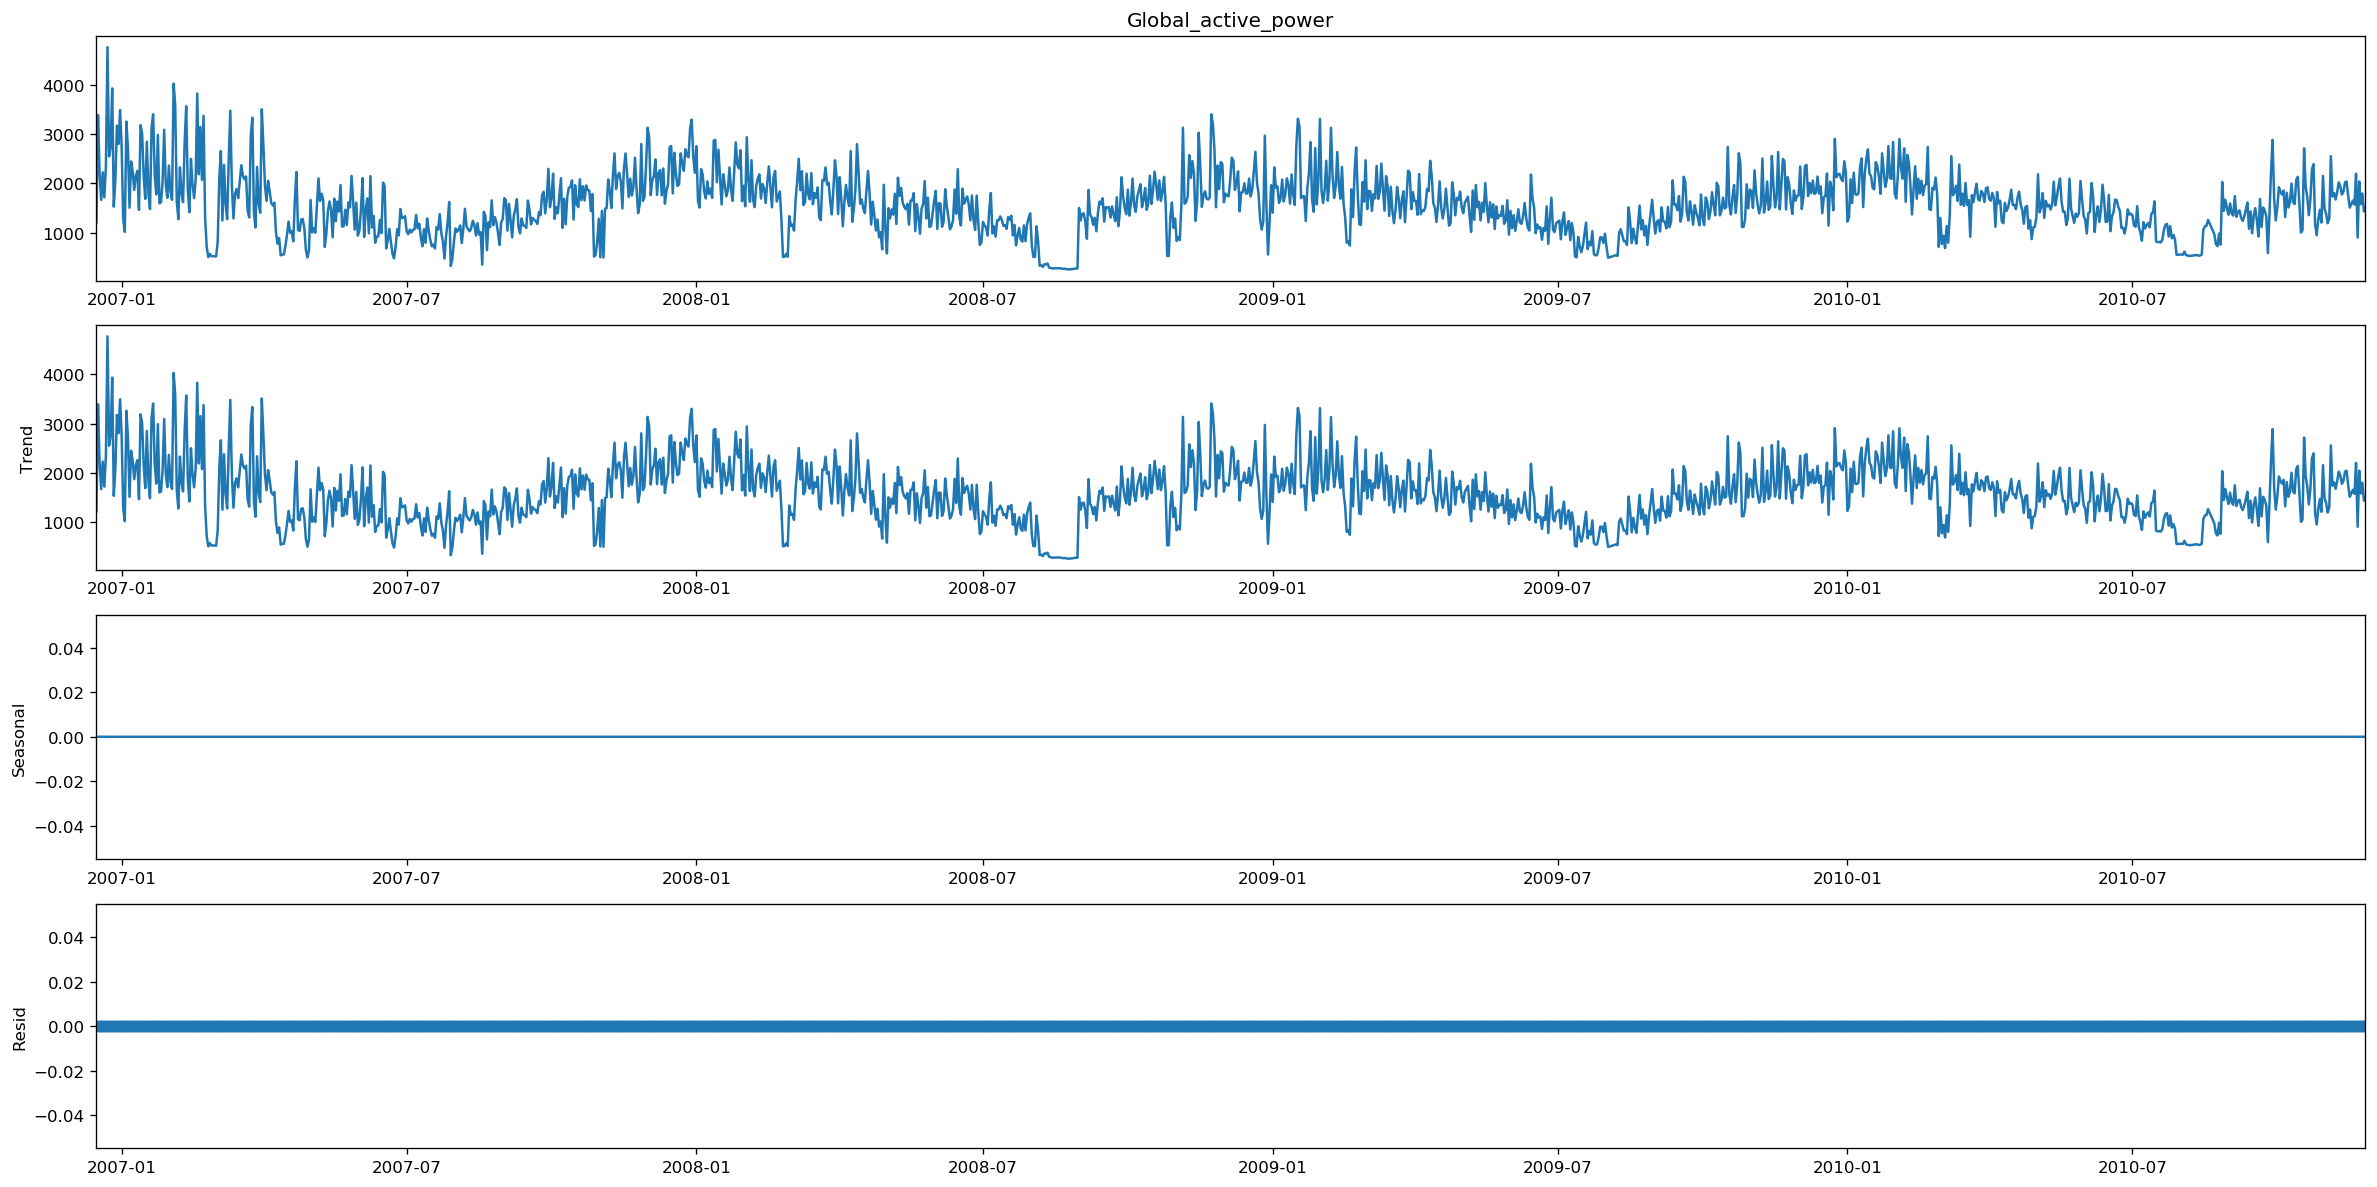

In [251]:
#Check for trend, seasonality and residual
import statsmodels.api as sm
from pylab import rcParams
decompose_series = sm.tsa.seasonal_decompose(Energy_Data_Daily['Global_active_power'], model='additive', period= 1)
decompose_series.plot()
plt.show()

In [252]:
#The plot above suggest the data is stationary
# perform an ADF test to confirm this whether the data is stationary or not
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(Energy_Data_Daily[['Global_active_power']])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -3.7101723628429015
p-value: 0.00397232473292033
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384


In [253]:
# the p - value is less than 0.5 which shows it is stationary.

In [254]:
Energy_Data_Active = Energy_Data_Daily[['Global_active_power']]
Energy_Data_Active.head()

,Global_active_power
Datetime,
2006-12-16,1209.176
2006-12-17,3390.460
2006-12-18,2203.826
2006-12-19,1666.194
2006-12-20,2225.748


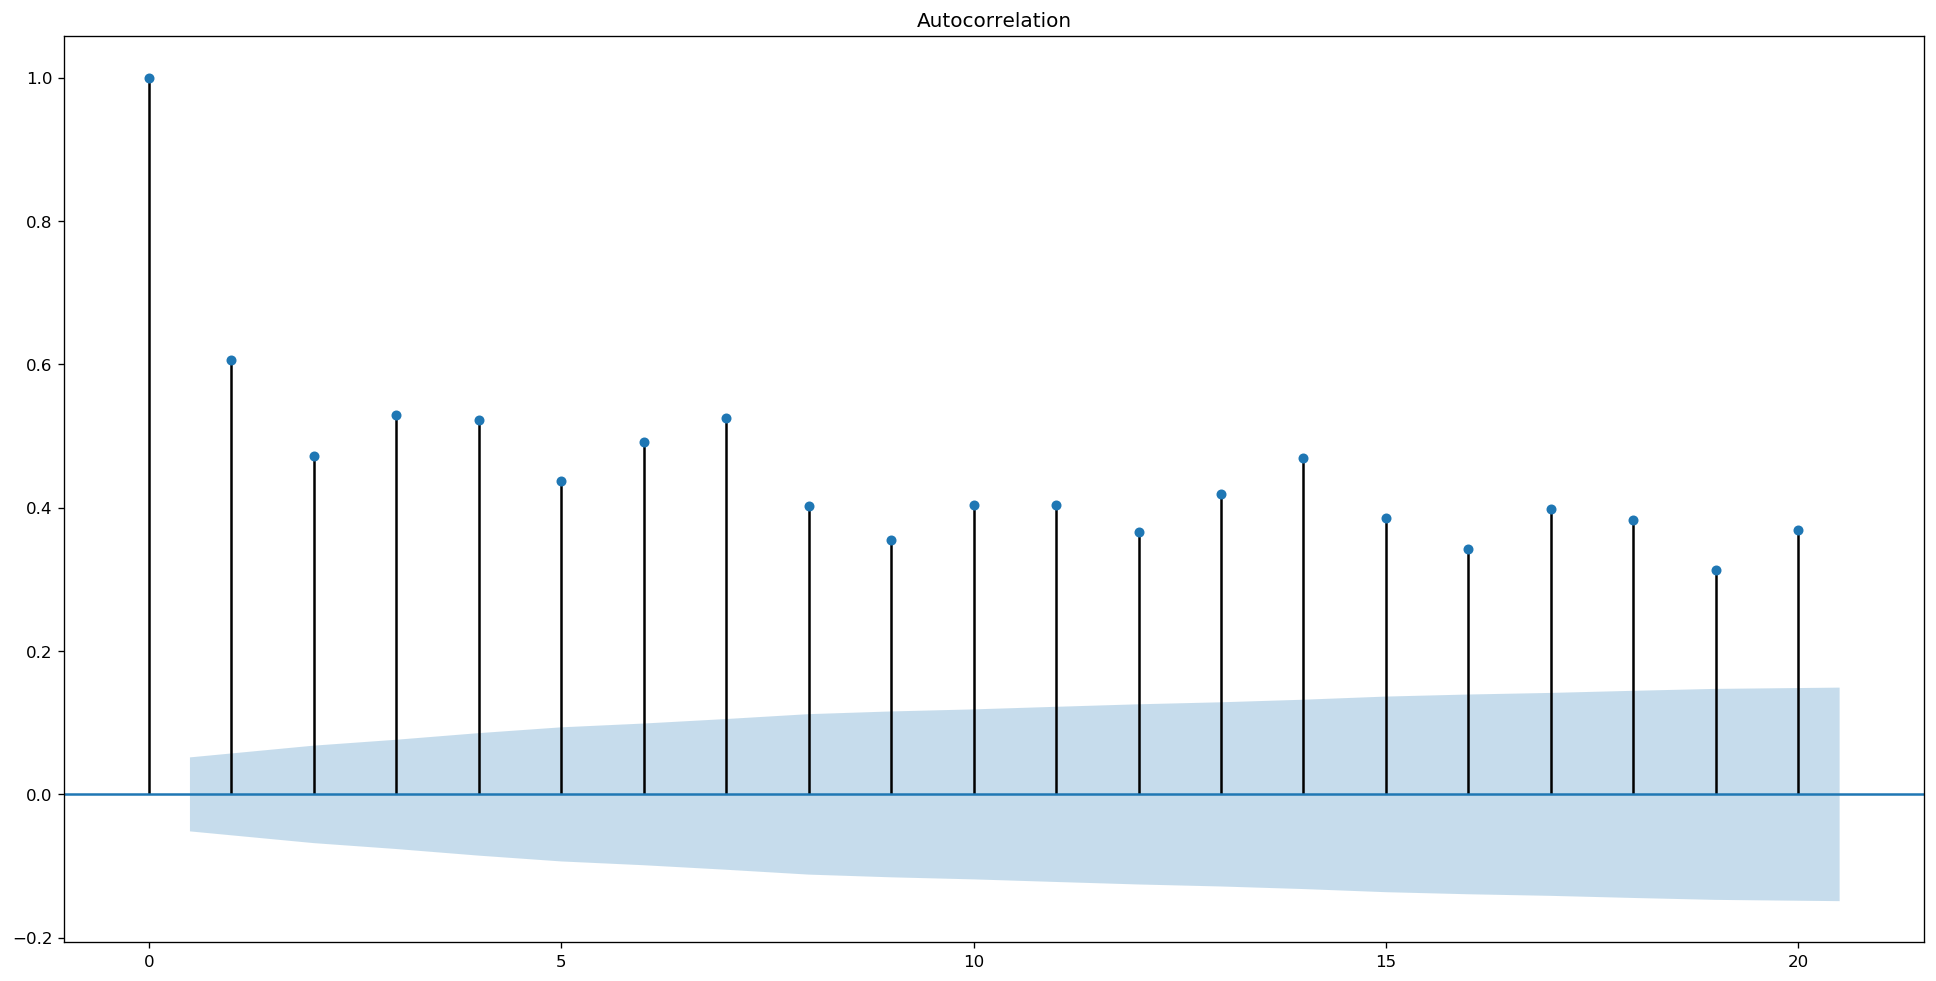

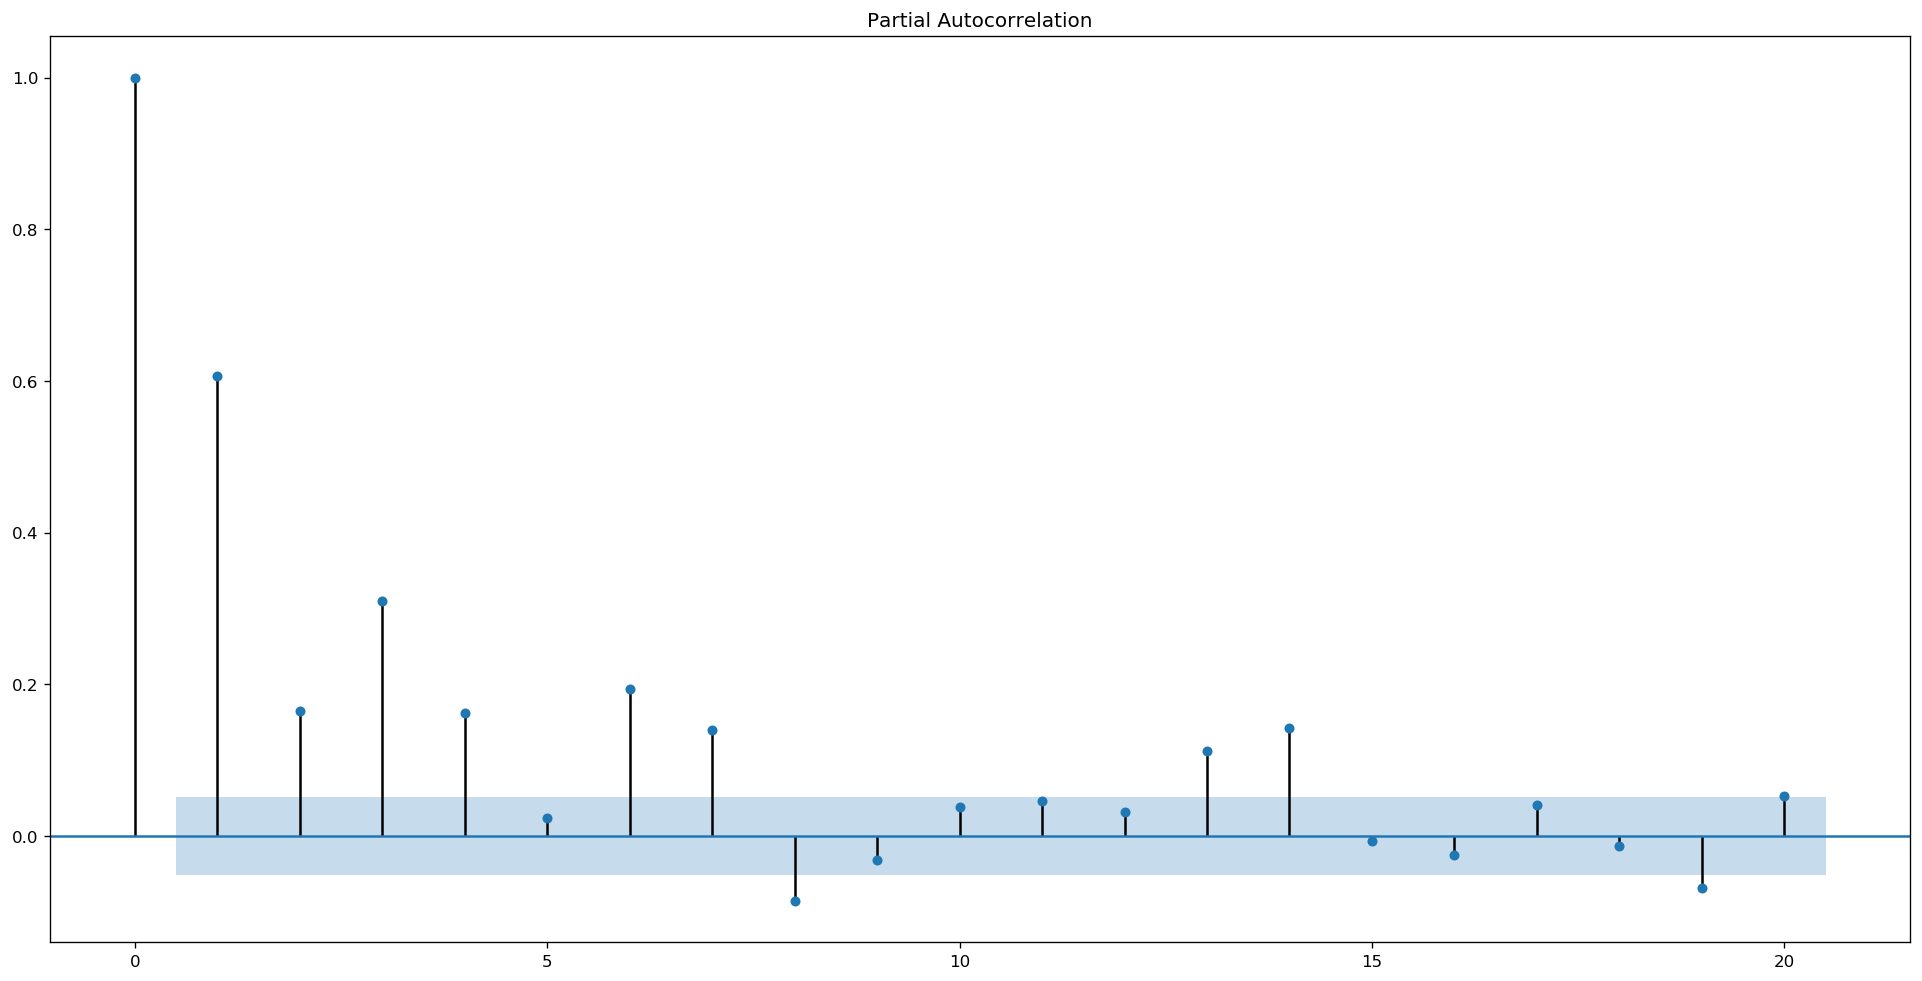

In [165]:
# Visualise the auto-correlation and partial auto-correlation Even though I did not inted to use Arima or Sarima model,
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF
plot_acf(Energy_Data_Active,lags= 20)
plt.show()
#PACF
plot_pacf(Energy_Data_Active,lags = 20)
plt.show()

In [166]:
# Reset the indes
Energy_Data_Daily = Energy_Data_Daily.reset_index()
Energy_Data_Daily.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Others
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933333
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666667
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433333
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900000
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800000


In [257]:
from numpy.random import seed
from scipy.stats import pearsonr
# prepare data
data1 = Energy_Data['Global_reactive_power']
data2 = Energy_Data['Global_active_power']
# calculate Pearson's correlation
corr,_ = pearsonr(data1, data2)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.25


In [167]:
#Isolate the target
Energy_Data_Daily = Energy_Data_Daily[['Datetime','Global_active_power']]
Energy_Data_Daily.head()

,Datetime,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [168]:
Energy_Data_Daily.shape

(1442, 2)

In [169]:
from matplotlib import pyplot
X = Energy_Data_Daily.values
train_size = int(len(X)-365 )
train = X[0:train_size]
test = X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 1442
Training Observations: 1077
Testing Observations: 365


In [198]:
Energy_Data_Daily = pd.DataFrame(train, columns=['ds','y'])
Test_Data = pd.DataFrame(test, columns=['ds','y'])
Test_Data.head()

,ds,y
0,2009-11-27,1380.03
1,2009-11-28,1858.95
2,2009-11-29,1650.96
3,2009-11-30,1745.19
4,2009-12-01,1756.38


In [190]:
#model
from fbprophet import Prophet
model = Prophet()

In [191]:
#Fit the model
m = model.fit(Energy_Data_Daily)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [192]:
#predict
future = model.make_future_dataframe(periods= 1, freq='D') 
forecast = model.predict(future) 
forecast.head(4)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1637.793244,1859.227496,2966.012504,1637.793244,1637.793244,776.478045,776.478045,776.478045,239.456271,239.456271,239.456271,537.021774,537.021774,537.021774,0.0,0.0,0.0,2414.271289
1,2006-12-17,1637.653290,1862.868018,2996.212946,1637.653290,1637.653290,779.738605,779.738605,779.738605,228.073886,228.073886,228.073886,551.664719,551.664719,551.664719,0.0,0.0,0.0,2417.391895
2,2006-12-18,1637.513335,1493.813561,2593.760185,1637.513335,1637.513335,406.586537,406.586537,406.586537,-160.420151,-160.420151,-160.420151,567.006688,567.006688,567.006688,0.0,0.0,0.0,2044.099872
3,2006-12-19,1637.373381,1641.758207,2727.317785,1637.373381,1637.373381,555.793891,555.793891,555.793891,-26.801653,-26.801653,-26.801653,582.595544,582.595544,582.595544,0.0,0.0,0.0,2193.167272


In [193]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2414.271289,1859.227496,2966.012504,1637.793244,1637.793244,1637.793244
1,2006-12-17,2417.391895,1862.868018,2996.212946,1637.653290,1637.653290,1637.653290
2,2006-12-18,2044.099872,1493.813561,2593.760185,1637.513335,1637.513335,1637.513335
3,2006-12-19,2193.167272,1641.758207,2727.317785,1637.373381,1637.373381,1637.373381
4,2006-12-20,2213.586071,1684.329110,2805.471754,1637.233426,1637.233426,1637.233426
...,...,...,...,...,...,...,...
1073,2009-11-23,2002.254419,1430.142374,2553.409343,1580.360159,1580.360159,1580.360159
1074,2009-11-24,2140.678434,1570.827747,2708.763669,1580.481751,1580.481751,1580.481751
1075,2009-11-25,2147.179843,1556.192654,2707.114151,1580.603344,1580.603344,1580.603344
1076,2009-11-26,1969.755685,1391.856525,2553.571145,1580.724937,1580.724937,1580.724937


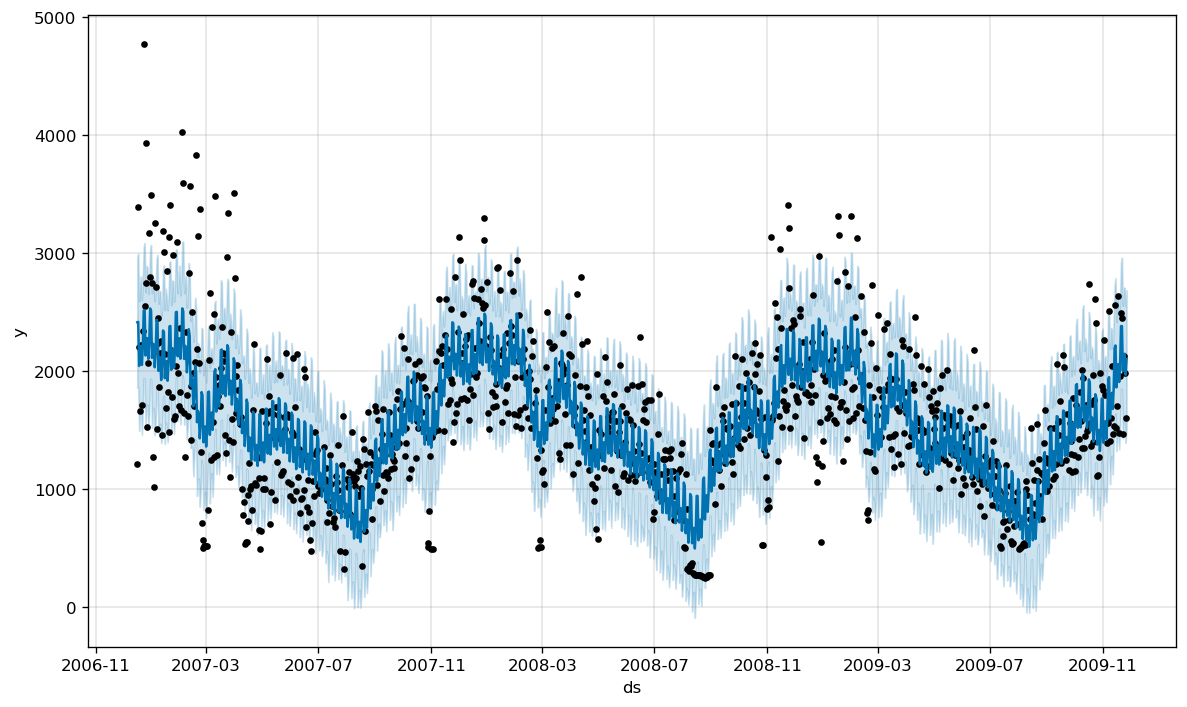

In [194]:
model.plot(forecast)
plt.show()       # this plots shows  the performance of the predicted 

In [199]:
# Make predictions and compare to test data
y_pred = model.predict(Test_Data)

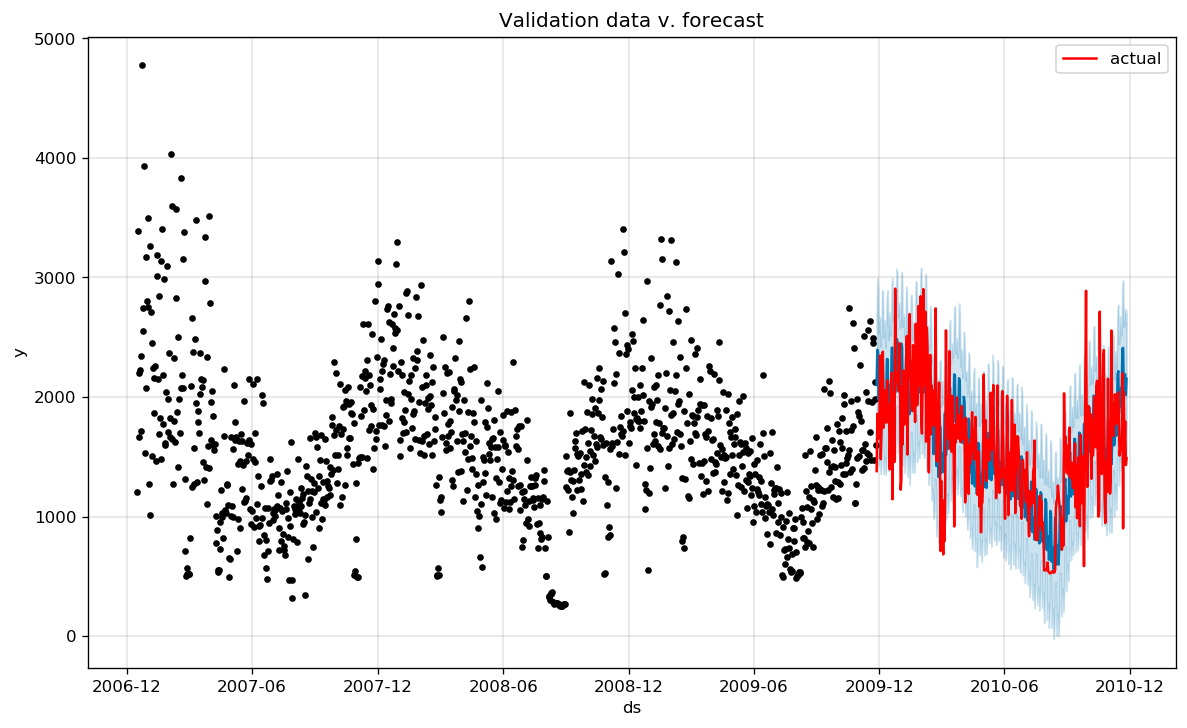

In [201]:
# Plot the model, forecast, and actual (test) data
model.plot(y_pred, uncertainty=True)
plt.plot(Test_Data['ds'], Test_Data['y'], color='r', label='actual')
plt.title('Validation data v. forecast')
plt.legend()

In [205]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='365.25 days', period='350 day', horizon = '4 days')

INFO:fbprophet:Making 3 forecasts with cutoffs between 2007-12-23 00:00:00 and 2009-11-22 00:00:00


In [203]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2007-12-27,2428.409576,1831.583188,3117.114518,2532.198,2007-12-26
1,2008-12-11,1909.498467,1286.959373,2477.699626,1432.522,2008-12-10
2,2009-11-26,1981.736590,1461.088912,2589.966042,1599.626,2009-11-25


In [206]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,112315.858874,335.135583,233.531102,0.149263,0.046191,0.666667
1,2 days,26214.067693,161.907590,123.144533,0.049387,0.024476,1.000000
2,3 days,32480.433222,180.223287,166.501984,0.076905,0.099997,1.000000
3,4 days,136209.660636,369.065930,336.673631,0.212316,0.256412,1.000000


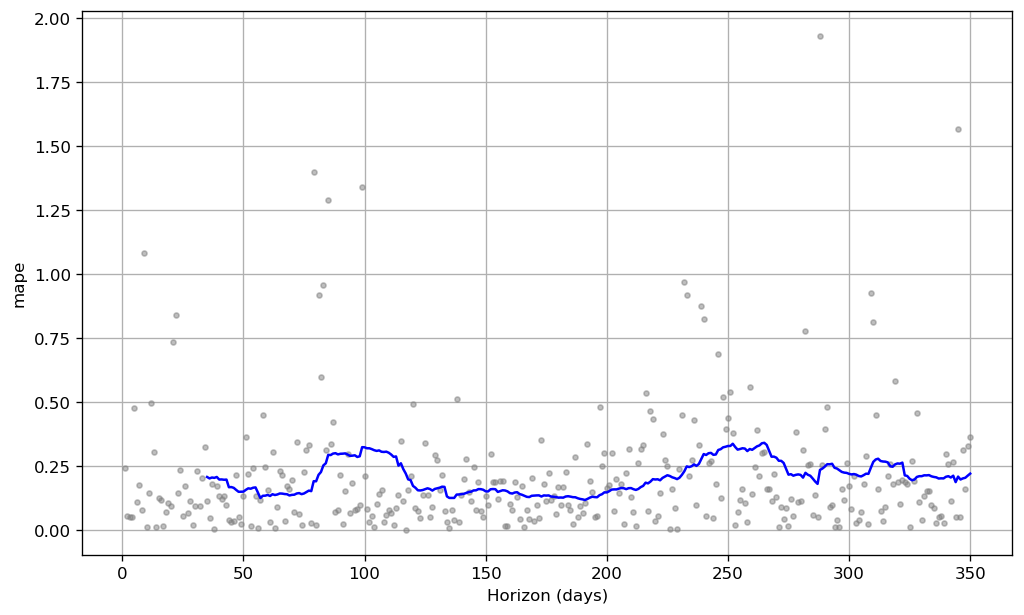

In [207]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv2, metric='mape')

In [234]:
from numpy.random import seed
from scipy.stats import pearsonr
# prepare data
data1 = Energy_Data_Daily['Global_reactive_power']
data2 = Energy_Data_Daily['Global_active_power']
# calculate Pearson's correlation
corr,_ = pearsonr(data1, data2)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.03


In [258]:
from numpy.random import seed
from scipy.stats import pearsonr
# prepare data
data1 = Energy_Data['Voltage']
data2 = Energy_Data['Global_intensity']
# calculate Pearson's correlation
corr,_ = pearsonr(data1, data2)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: -0.41
